# Create a simple NN with Keras

In [1]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

df.head()

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.columns

Index(['timespreg', 'gluctol', 'diaspb', 'triceps', 'insulin', 'massindex',
       'pedigree', 'age', 'target'],
      dtype='object')

In [3]:
#Print class frequencies through pandas 
print(df.groupby('target').size())

target
0    500
1    268
dtype: int64


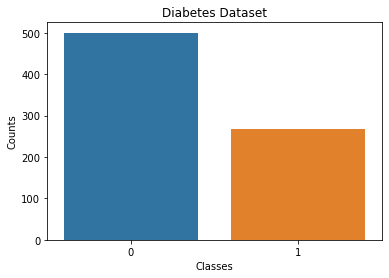

In [4]:
#Bar plot for the target variable
%matplotlib inline
import seaborn as sns #https://seaborn.pydata.org/
import matplotlib.pyplot as plt #https://matplotlib.org/

sns.countplot(x="target", data=df)
plt.title("Diabetes Dataset")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.show()

array([[<AxesSubplot:title={'center':'timespreg'}>,
        <AxesSubplot:title={'center':'gluctol'}>,
        <AxesSubplot:title={'center':'diaspb'}>],
       [<AxesSubplot:title={'center':'triceps'}>,
        <AxesSubplot:title={'center':'insulin'}>,
        <AxesSubplot:title={'center':'massindex'}>],
       [<AxesSubplot:title={'center':'pedigree'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

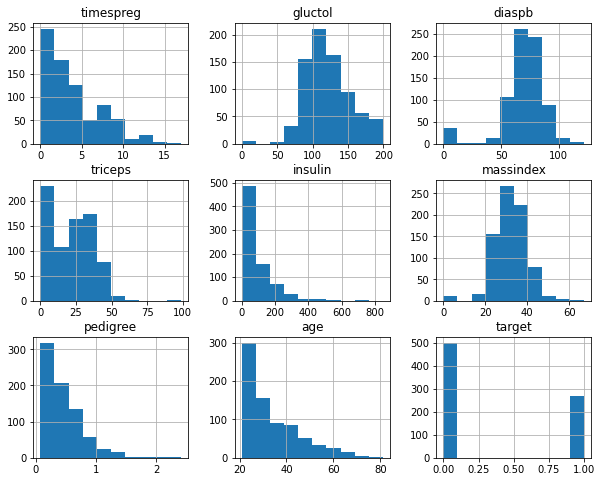

In [5]:
df.hist(figsize=(10,8))

In [6]:
# slicing the dataframe EXPL_VARs/TARGET
import numpy as np
df = df.values
x=df[:,0:-1] 
y=df[:,-1]

print(x.shape)

(768, 8)


In [124]:
print(y.shape)

(768,)


In [7]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size =0.3, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability
print(x_train.shape)
print(x_test.shape)

(537, 8)
(231, 8)


## Create a NN model with Keras

In [126]:
# Install a conda package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix {sys.prefix} keras tensorflow

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

np.random.seed(123)

model = Sequential()
model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## Train the model and print a summary representation of the model

In [42]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                90        
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
None


# Fit the model

In [43]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100,
                    batch_size=32)

Epoch 1/100
14/14 [==============================] - 1s 39ms/step - loss: 24.0005 - accuracy: 0.4410 - val_loss: 12.5609 - val_accuracy: 0.3889
Epoch 2/100
14/14 [==============================] - 0s 16ms/step - loss: 18.5738 - accuracy: 0.4070 - val_loss: 7.3359 - val_accuracy: 0.4167
Epoch 3/100
14/14 [==============================] - 0s 24ms/step - loss: 15.8748 - accuracy: 0.4217 - val_loss: 3.2706 - val_accuracy: 0.4167
Epoch 4/100
14/14 [==============================] - 0s 15ms/step - loss: 9.6073 - accuracy: 0.4610 - val_loss: 1.9698 - val_accuracy: 0.4537
Epoch 5/100
14/14 [==============================] - 0s 17ms/step - loss: 7.3628 - accuracy: 0.4776 - val_loss: 2.6314 - val_accuracy: 0.5463
Epoch 6/100
14/14 [==============================] - 0s 12ms/step - loss: 5.7905 - accuracy: 0.5290 - val_loss: 3.2064 - val_accuracy: 0.6111
Epoch 7/100
14/14 [==============================] - 0s 18ms/step - loss: 4.2719 - accuracy: 0.5187 - val_loss: 3.0729 - val_accuracy: 0.6204
Ep

14/14 [==============================] - 0s 31ms/step - loss: 0.7063 - accuracy: 0.6756 - val_loss: 0.6931 - val_accuracy: 0.6111
Epoch 59/100
14/14 [==============================] - 0s 28ms/step - loss: 0.6613 - accuracy: 0.6506 - val_loss: 0.6873 - val_accuracy: 0.6111
Epoch 60/100
14/14 [==============================] - 0s 24ms/step - loss: 0.6526 - accuracy: 0.6875 - val_loss: 0.6819 - val_accuracy: 0.5926
Epoch 61/100
14/14 [==============================] - 0s 29ms/step - loss: 0.6166 - accuracy: 0.7236 - val_loss: 0.6900 - val_accuracy: 0.5833
Epoch 62/100
14/14 [==============================] - 0s 26ms/step - loss: 0.6399 - accuracy: 0.6444 - val_loss: 0.6754 - val_accuracy: 0.6204
Epoch 63/100
14/14 [==============================] - 0s 26ms/step - loss: 0.6507 - accuracy: 0.6582 - val_loss: 0.6797 - val_accuracy: 0.6204
Epoch 64/100
14/14 [==============================] - 0s 15ms/step - loss: 0.6431 - accuracy: 0.6742 - val_loss: 0.6762 - val_accuracy: 0.6296
Epoch 65/100

# Evaluate the model and print its loss and accuracy score

In [33]:
score = model.evaluate(x_test, y_test)
print(score)

8/8 [==============================] - 0s 12ms/step - loss: 0.6431 - accuracy: 0.6494
[0.6430614590644836, 0.649350643157959]


In [34]:
y_pred_prob=model.predict(x_test)
y_pred_prob

array([[0.245805  ],
       [0.28015813],
       [0.28015813],
       [0.32794666],
       [0.29545438],
       [0.31377316],
       [0.28448278],
       [0.26406345],
       [0.29903942],
       [0.31551456],
       [0.26734042],
       [0.28109068],
       [0.2807528 ],
       [0.3034677 ],
       [0.2853351 ],
       [0.2904228 ],
       [0.3191368 ],
       [0.2790026 ],
       [0.3115602 ],
       [0.28015813],
       [0.30824775],
       [0.28015813],
       [0.30840713],
       [0.26684204],
       [0.32818943],
       [0.328203  ],
       [0.33882585],
       [0.30341488],
       [0.3025569 ],
       [0.30910027],
       [0.30710214],
       [0.30272073],
       [0.27724832],
       [0.31067193],
       [0.28588402],
       [0.28015813],
       [0.30582452],
       [0.36146832],
       [0.2792362 ],
       [0.36100137],
       [0.27870825],
       [0.27170458],
       [0.29338378],
       [0.34650517],
       [0.28647238],
       [0.30699018],
       [0.28094497],
       [0.316

              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79       150
         1.0       0.00      0.00      0.00        81

    accuracy                           0.65       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.42      0.65      0.51       231



/home/mausoto/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mausoto/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mausoto/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


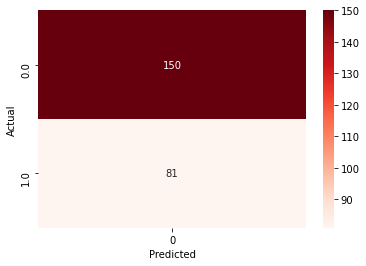

In [44]:
y_pred=np.where(y_pred_prob > .7, 1,0).flatten()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
import pandas as pd

print(classification_report(y_test, y_pred))

confusion_matrix = pd.crosstab( y_test,y_pred,rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt='g',cmap="Reds")
plt.show()

# Plot model training history

In [45]:
history.history

{'loss': [21.668169021606445,
  17.871265411376953,
  14.305098533630371,
  8.965534210205078,
  7.067042827606201,
  5.563276290893555,
  3.963343381881714,
  3.7514472007751465,
  3.245098114013672,
  2.2375128269195557,
  2.4308581352233887,
  1.92691171169281,
  1.6956455707550049,
  1.5467193126678467,
  1.5091493129730225,
  1.1450238227844238,
  1.403723120689392,
  0.9364394545555115,
  1.2016338109970093,
  0.985113799571991,
  1.0324223041534424,
  1.0155619382858276,
  0.9878460168838501,
  0.8108600378036499,
  0.812033474445343,
  0.8826569318771362,
  0.7593092918395996,
  0.8405137062072754,
  0.8512581586837769,
  0.7680037617683411,
  0.6837010383605957,
  0.7574123740196228,
  0.6941574811935425,
  0.7576691508293152,
  0.7129887342453003,
  0.7021854519844055,
  0.6795675158500671,
  0.6634376645088196,
  0.6878859400749207,
  0.7653347849845886,
  0.6778123378753662,
  0.7077273726463318,
  0.7328488230705261,
  0.6614271998405457,
  0.6881176233291626,
  0.69368278

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


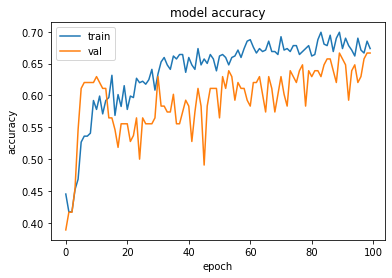

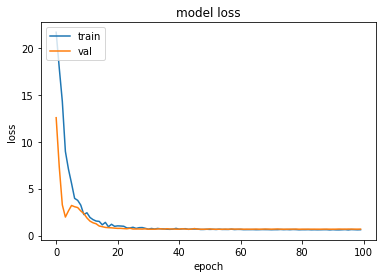

In [46]:
import matplotlib.pyplot as plt

%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()